In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [26]:
data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

In [27]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [29]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [30]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [32]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 6 ... 6 2 2] [1 9 1 ... 0 2 9]
0.12828813559322033
Iteration:  10
[4 6 6 ... 6 9 2] [1 9 1 ... 0 2 9]
0.2026949152542373
Iteration:  20
[1 6 5 ... 6 9 2] [1 9 1 ... 0 2 9]
0.29315254237288135
Iteration:  30
[1 6 1 ... 6 9 2] [1 9 1 ... 0 2 9]
0.37689830508474575
Iteration:  40
[1 6 1 ... 6 9 2] [1 9 1 ... 0 2 9]
0.4402542372881356
Iteration:  50
[1 6 1 ... 6 9 2] [1 9 1 ... 0 2 9]
0.48886440677966103
Iteration:  60
[1 6 1 ... 6 9 2] [1 9 1 ... 0 2 9]
0.5292711864406779
Iteration:  70
[1 6 1 ... 6 9 2] [1 9 1 ... 0 2 9]
0.5649152542372882
Iteration:  80
[1 6 1 ... 6 9 9] [1 9 1 ... 0 2 9]
0.5954915254237289
Iteration:  90
[1 6 1 ... 6 9 9] [1 9 1 ... 0 2 9]
0.620457627118644
Iteration:  100
[1 6 1 ... 0 2 9] [1 9 1 ... 0 2 9]
0.6416101694915254
Iteration:  110
[1 6 1 ... 0 2 9] [1 9 1 ... 0 2 9]
0.6591525423728813
Iteration:  120
[1 4 1 ... 0 2 9] [1 9 1 ... 0 2 9]
0.674677966101695
Iteration:  130
[1 4 1 ... 0 2 9] [1 9 1 ... 0 2 9]
0.6885762711864407
Iteration:  140

In [33]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


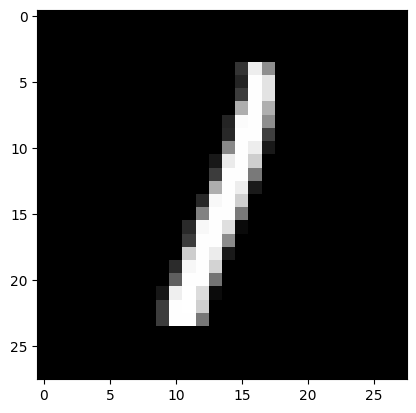

Prediction:  [9]
Label:  9


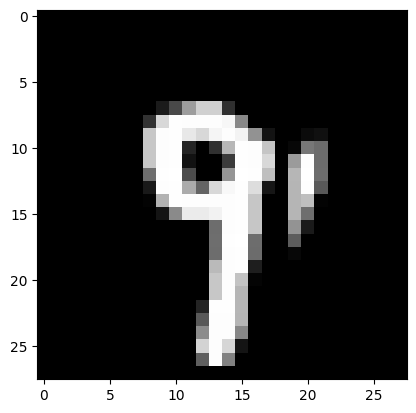

Prediction:  [1]
Label:  1


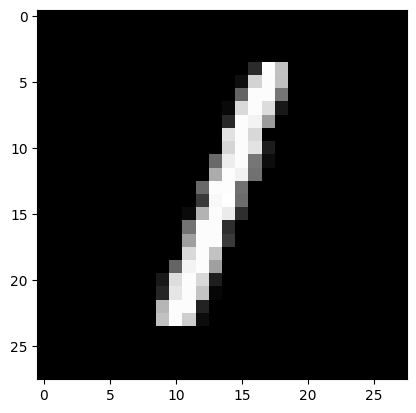

Prediction:  [3]
Label:  3


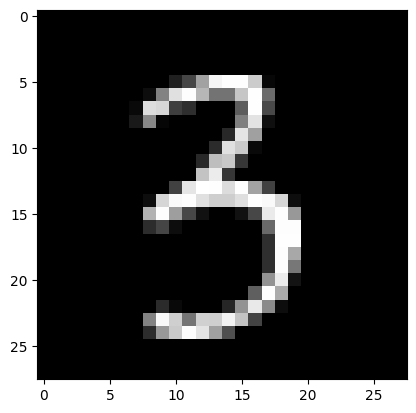

In [34]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [36]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[1 3 8 1 7 6 3 3 5 4 7 9 9 0 8 1 7 0 3 6 4 9 8 0 4 7 8 3 2 0 0 7 8 2 7 8 2
 8 8 8 5 0 4 7 6 2 6 0 9 6 1 0 9 8 0 9 4 9 4 7 0 8 9 1 7 5 2 5 3 6 7 4 3 6
 6 0 1 8 0 9 9 1 5 4 1 2 0 3 2 5 9 6 2 7 0 9 1 9 7 4 3 9 9 2 8 6 6 5 6 6 0
 0 5 1 7 3 0 9 5 0 8 9 6 7 6 9 5 2 0 8 3 1 5 8 1 5 1 9 6 4 7 4 8 2 4 3 4 9
 7 0 1 7 0 6 9 6 6 6 9 9 8 7 8 1 7 8 1 6 8 9 2 0 1 0 1 2 9 1 7 1 1 8 6 7 4
 2 5 3 7 5 3 0 2 0 3 7 8 1 3 0 1 2 1 9 0 2 8 0 1 1 8 1 2 6 0 9 1 2 9 7 1 1
 1 5 4 0 1 0 9 5 6 5 8 0 1 0 2 5 0 2 2 0 1 3 2 8 0 6 8 6 0 0 7 0 4 7 2 3 2
 2 2 9 5 9 3 3 7 5 2 9 1 9 8 2 8 7 6 5 4 0 4 5 3 7 2 1 3 2 8 9 7 6 0 9 1 3
 3 8 0 4 2 2 8 8 2 4 0 3 8 4 0 4 8 3 5 1 6 0 3 9 8 3 4 3 5 0 1 0 1 5 0 4 4
 5 7 1 0 8 7 7 1 8 1 6 3 1 6 8 6 1 3 0 6 1 9 8 6 5 7 9 8 9 2 6 2 9 0 2 8 1
 3 2 0 7 3 1 1 9 1 3 4 5 0 9 2 3 3 9 6 0 1 6 0 4 0 6 8 2 0 6 7 7 8 5 3 6 8
 8 8 0 7 3 7 3 4 3 2 7 9 7 6 6 3 0 2 4 5 7 1 7 0 1 4 8 4 4 0 1 1 1 9 8 6 7
 9 8 1 2 1 7 2 1 3 2 7 4 1 0 0 1 7 6 3 4 3 1 6 6 2 8 2 3 4 2 3 4 3 2 8 9 9
 9 9 1 3 7 5 3 1 6 7 3 1 

0.841